In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

import pycountry
import seaborn as sns

In [2]:
swiss_actor1 = pd.read_csv('../SwissActor1.csv', sep = ',', decimal = '.')
swiss_actor2 = pd.read_csv('../SwissActor2.csv', sep = ',', decimal = '.')

swiss_actor_tot = pd.concat([swiss_actor1, swiss_actor2], axis=0)
swiss_actor_tot.reset_index(inplace=True)

nodes1 = swiss_actor1['SOURCEURL'].size
nodes2 = swiss_actor2['SOURCEURL'].size
nodes_tot = swiss_actor_tot['SOURCEURL'].size

In [3]:
# What are the news website involved in this time span?

web_news = [''] * nodes_tot
media_df = pd.DataFrame(columns=['Medias','Ocurrences'])

for row in range(0, nodes_tot):
    temp = swiss_actor_tot['SOURCEURL'][row].rsplit('//')
    
    if len(temp) == 2:
        temp2 = temp[1].rsplit('/')[0]
        web_news[row] = temp2
    else:
        web_news[row] = ''
    
    if web_news[row] not in media_df['Medias'].values:
        media_df.loc[len(media_df)]=[web_news[row], 1] 
    else:
        media_df.loc[media_df['Medias'] == web_news[row], 'Ocurrences'] += 1
        

In [4]:
# To focus on the Swiss media institutes, we are going to extract the news site ending with .ch
nodes_media = media_df['Medias'].size
swiss_media = pd.DataFrame()

for row in range(0, nodes_media):
    if media_df['Medias'][row][-3:] == '.ch':
        swiss_media = swiss_media.append(media_df.loc[row])

In [37]:
swiss_media

,Medias,Ocurrences
138,www.swissinfo.ch,279.0
492,www.admin.ch,16.0
815,www.isn.ethz.ch,14.0
1063,www.thelocal.ch,4.0


In [5]:
# Sorting the media outlets, to see which ones relayed the most information on Switzerland during this time frame

media_df = media_df.sort_values(by=['Ocurrences'])
media_df.reindex(index=media_df.index[::-1])

,Medias,Ocurrences
104,,1172
140,www.reuters.com,374
97,www.dailystar.com.lb,280
138,www.swissinfo.ch,279
54,www.dw.de,264
185,news.yahoo.com,257
87,voiceofrussia.com,240
92,english.farsnews.com,224
75,www.bloomberg.com,215
12,www.theguardian.com,169


In [6]:
# Try to filter the news related to the immigration ban, by finding key-words in the url
key_words = ['ban', 'immigration', 'votation', 'immigrant', 'conservative']
immigration_df = pd.DataFrame()

for row in range(0, nodes_tot):
    if any(word in swiss_actor_tot['SOURCEURL'][row] for word in key_words):
        immigration_df = immigration_df.append(swiss_actor_tot.loc[row])

In [32]:
# How mediatized was the votation, with respect to the world media coverage of Switzerland?

day_swiss = np.mod(swiss_actor_tot['DATEADDED'], 100).values
month_swiss = np.mod(swiss_actor_tot['MonthYear'], 10).values

day_immigration = np.mod(immigration_df['DATEADDED'], 100).values
month_immigration = np.mod(immigration_df['MonthYear'], 10).values
nodes_immigration = immigration_df['SOURCEURL'].size

swiss_news = np.zeros((31, 3))
swiss_hist = np.zeros((nodes_tot, 1))
immigration_news = np.zeros((31, 3))
immigration_hist = np.zeros((nodes_immigration, 1))

for i in range(0, nodes_tot):
    day_temp = day_swiss[i] - 1
    month_temp = int(month_swiss[i]) - 1
    swiss_news[day_swiss[i] - 1, int(month_swiss[i]) - 1] += 1
    swiss_hist[i, 0] = month_temp * 3 + day_temp
    
for i in range(0, nodes_immigration):
    immigration_news[int(day_immigration[i]) - 1, int(month_immigration[i]) - 1] += 1
    day_temp = int(day_immigration[i]) - 1
    month_temp = int(month_immigration[i]) - 1
    immigration_hist[i, 0] = month_temp * 3 + day_temp

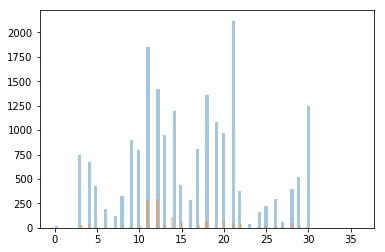

In [34]:
fig, ax = plt.subplots()
for a in [swiss_hist, immigration_hist]:
    sns.distplot(a, bins=93, ax=ax, kde=False)

In [36]:
# Which countries are contacting Switzerland regarding the immigration ban? Using the Actor1Code

immigration_actor1 = immigration_df['Actor1Code']
immigration_actor1

7           CHE
22       MNCCHE
42          CHE
63          CHE
74       CHELEG
77          CHE
84          CHE
92          CHE
120      MNCCHE
127         CHE
151         CHE
161         CHE
169         CHE
242         CHE
243         CHE
259      MNCCHE
282         CHE
283         CHE
284         CHE
285         CHE
316         CHE
336         CHE
340         CHE
419         CHE
420         CHE
421         CHE
424      CHECVL
425      CHEBUS
429         CHE
431         CHE
          ...  
19490       LEG
19549       GOV
19609       USA
19614       USA
19634       USA
19635       USA
19639       USA
19640       USA
19644       CHE
19645       CHE
19646       JUD
19647    USAJUD
19649       IRN
19670       GOV
19671       GOV
19697       NaN
19698    USACVL
19699       CVL
19700       USA
19705    CHEBUS
19746       GOV
19764    MNCCHE
19778       USA
19779       USA
19812       BUS
19819    MNCUSA
19866       LEG
19867       LEG
19874       LEG
19943       USA
Name: Actor1Code, Length